# Loan Application Status Prediction
### Project Description

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 
Independent Variables:
  
1. Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases

2. Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions

3. Married - This refers to applicant being in a state of matrimony

4. Dependents - This refres to persons who depends on the applicants for 
survival

5. Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university

6. Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer

7. Applicant Income - This refers to disposable income available for the applicant's use under State law.

8. CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.

9. Loan_Amount - This refers to the amount of money an applicant owe at any given time.

10. Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant

11. Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.

12. Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.

13. Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.

We have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from scipy.stats import randint

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

from statsmodels.stats.outliers_influence import variance_inflation_factor


In [2]:
df = pd.read_csv("C:/Users/KHUSHBOO RANI/OneDrive/Desktop/Projects/ML project/loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
df.tail(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
604,LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y
605,LP002960,Male,Yes,0,Not Graduate,No,2400,3800.0,NaN,180.0,1.0,Urban,N
606,LP002961,Male,Yes,1,Graduate,No,3400,2500.0,173.0,360.0,1.0,Semiurban,Y
607,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
df.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
379,LP002225,Male,Yes,2,Graduate,No,5391,0.0,130.0,360.0,1.0,Urban,Y
149,LP001520,Male,Yes,0,Graduate,No,4860,830.0,125.0,360.0,1.0,Semiurban,Y
408,LP002315,Male,Yes,1,Graduate,No,8300,0.0,152.0,300.0,0.0,Semiurban,N
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
343,LP002126,Male,Yes,3+,Not Graduate,No,3173,0.0,74.0,360.0,1.0,Semiurban,Y
376,LP002219,Male,Yes,3+,Graduate,No,8750,4996.0,130.0,360.0,1.0,Rural,Y
24,LP001052,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
535,LP002732,Male,No,0,Not Graduate,NaN,2550,2042.0,126.0,360.0,1.0,Rural,Y
366,LP002187,Male,No,0,Graduate,No,2500,0.0,96.0,480.0,1.0,Semiurban,N
219,LP001734,Female,Yes,2,Graduate,No,4283,2383.0,127.0,360.0,NaN,Semiurban,Y


## EDA (Exploratory data analysis)

In [6]:
df.shape

(614, 13)

In [7]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
# Lets check all the datatypes of our dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


As per above information we can see that our dataset has 5 integer values and 8 object values.

We will need to treat the object datatype columns so that our machine learning model can understand the data

In [9]:
# Lets check the number of unique values in our dataset columns:
df.nunique().to_frame("Unique Values")

,Unique Values
Loan_ID,614
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,203
Loan_Amount_Term,10


In [10]:
# Lets check the missing data if any:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There is some missing values in dataset, So we treat them

### Treating Null values

In [11]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [12]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

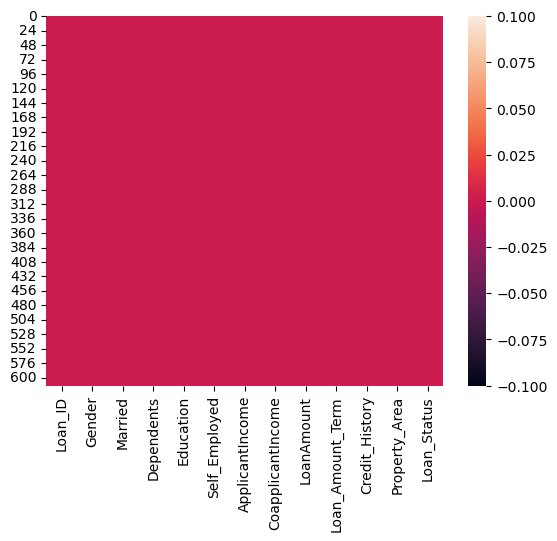

In [13]:
#plotting missing values in heatmap is there is present
sns.heatmap(df.isnull())
plt.show()

In [14]:
print("Taotal missing values", df.isnull().sum().sum())

Taotal missing values 0


Treated All missing values 

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,146.412162,84.037468,9.0,100.25,129.0,164.75,700.0
Loan_Amount_Term,614.0,342.000000,64.372489,12.0,360.00,360.0,360.00,480.0
Credit_History,614.0,0.842199,0.349681,0.0,1.00,1.0,1.00,1.0


Observations:

1. The standard deviation of certain variables are quite high implying that ceratin outliers exsist in the distribution. 
2. Mean is more the 50% median value implying data is rightly skewed and not normally distributed. 
3. Some level of skewness is also there in the dataset. 

In [16]:
# Droping unnecessary column  'Loan_ID' from the DataFrame
df = df.drop('Loan_ID', axis=1)


In [17]:
# checking duplicates and removing it

print("Before removing duplicates:", df.duplicated().sum())

df = df[~df.duplicated()]

print("After removing duplicates:", df.duplicated().sum())

Before removing duplicates: 0
After removing duplicates: 0


There is no duplicate data

## Exploratry Data Analysis

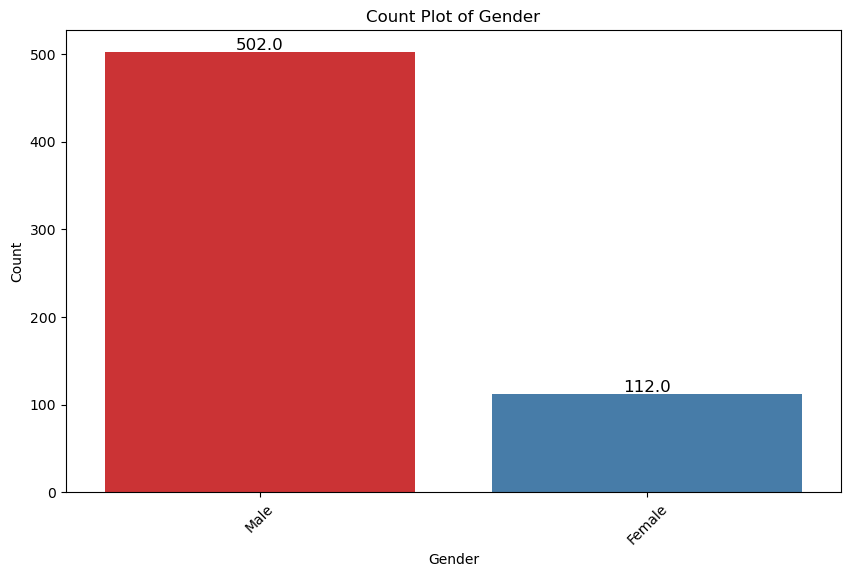

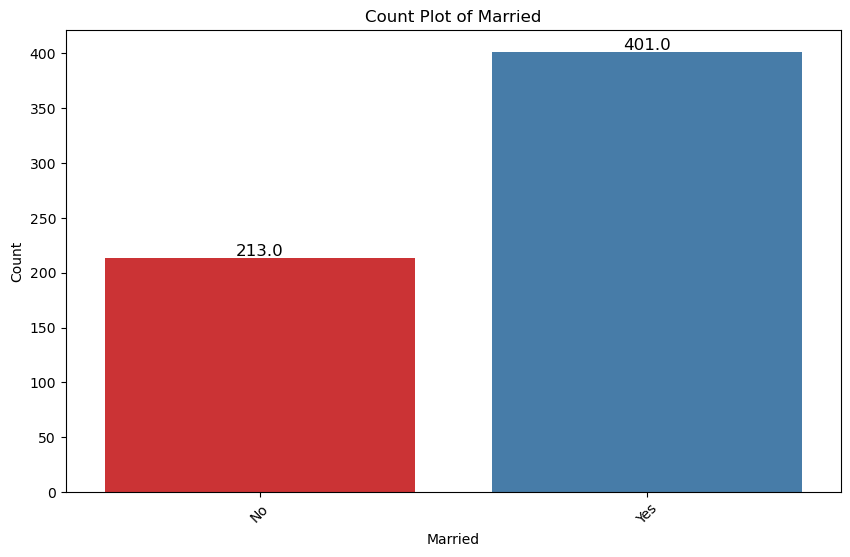

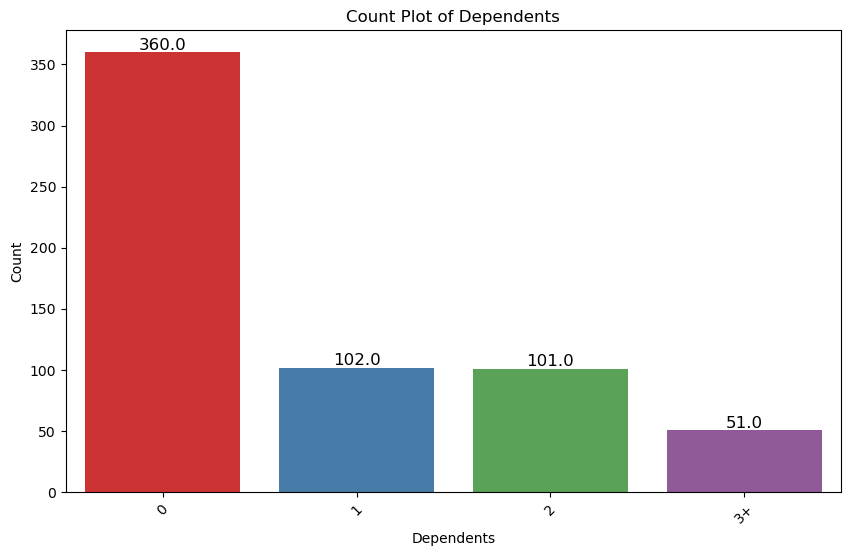

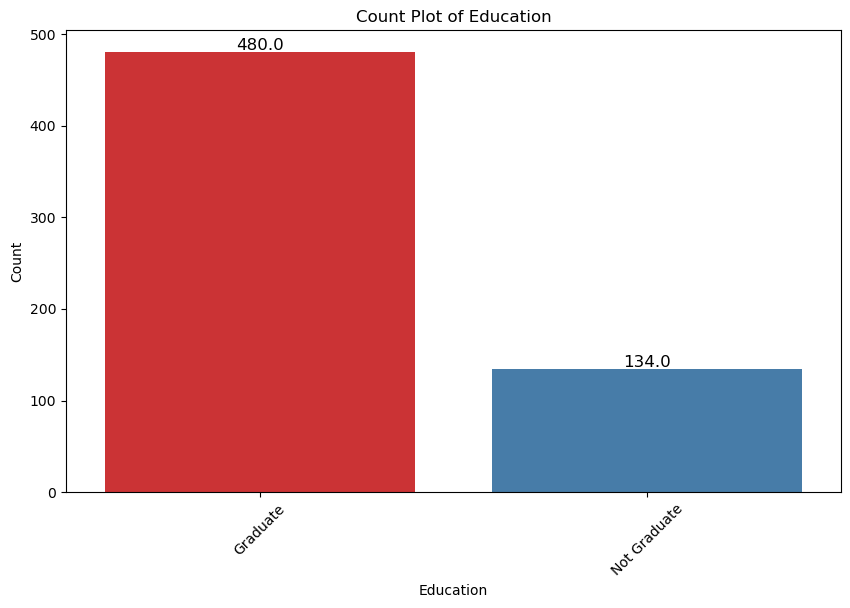

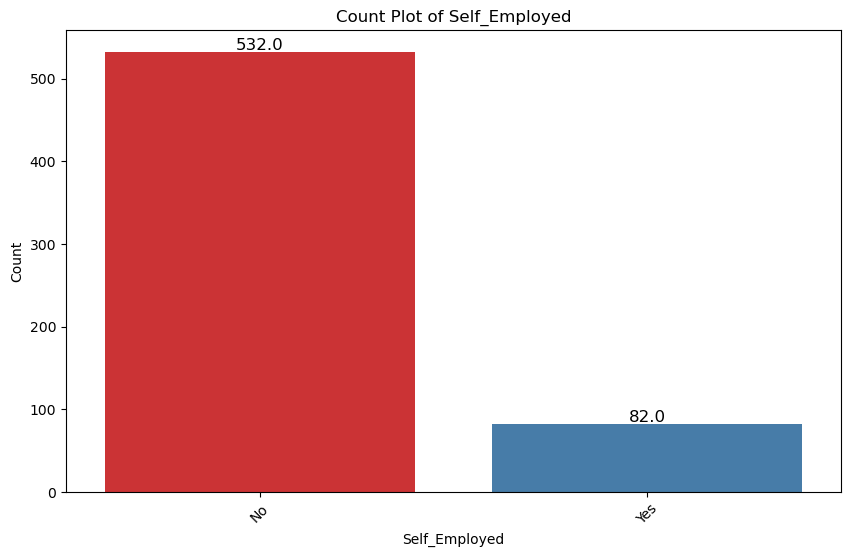

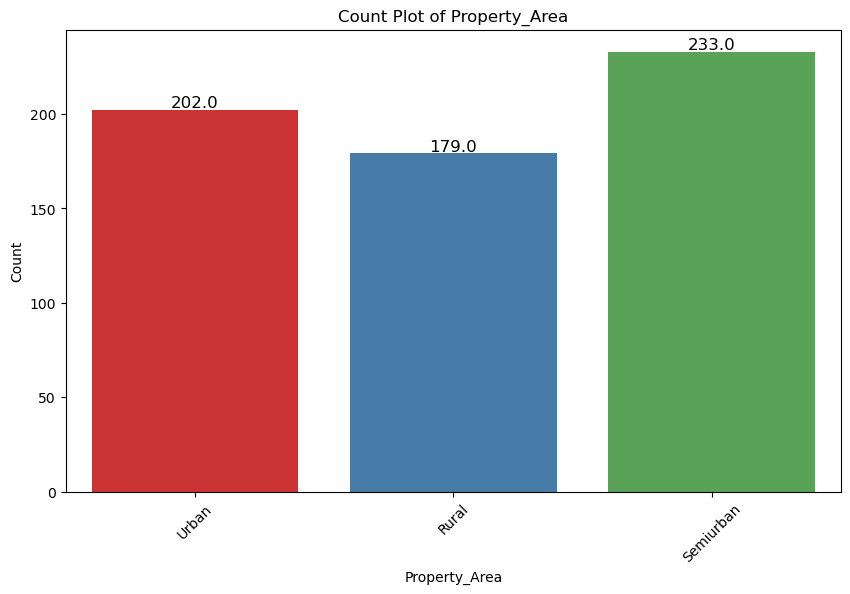

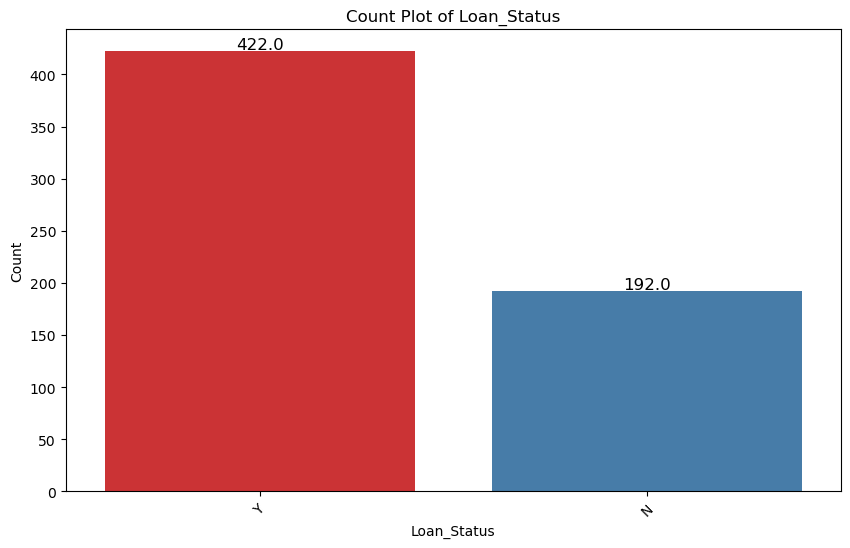

In [18]:
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=df, x=col, palette='Set1')
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

    plt.show()

1. In Gender columns MAles count are about 500 and  female are about 100
2. In Married status married people are more nearley 400 and unmarried is about 200
3. In Dependent column independ are more in count abot 350 , 1 is about 100, 2 is also about 100 and 3+ is nearly about 50
4. In Education column Graduate people are more nearley 500 and Not Graduiate little bite nore then 100
5. In Self_Employed column No is more about littile bit higher then 500 and yes is about less then 100
6. In property area column more people are living in Semiurban are nearley 200, In rural about less then 200 and in urban nearley 200
7. In loan_status more tyhen 400 people takken loan and nearley 200 did not

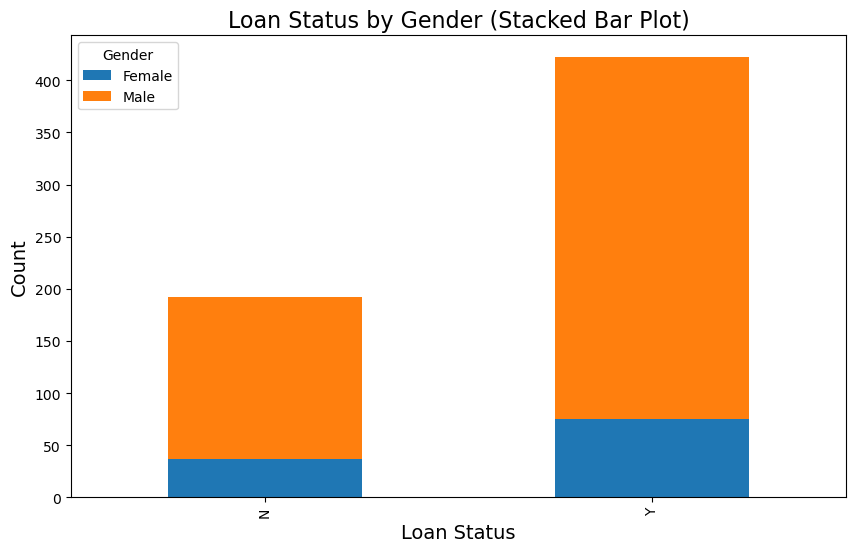

In [19]:
df.groupby(['Loan_Status', 'Gender']).size().unstack().plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Loan Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Loan Status by Gender (Stacked Bar Plot)', fontsize=16)
plt.show()


In [20]:
df.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y


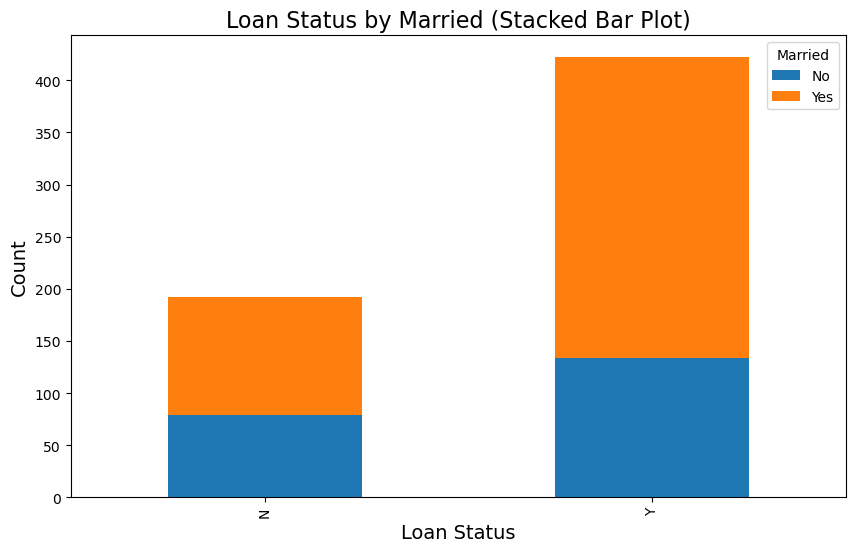

In [21]:
df.groupby(['Loan_Status', 'Married']).size().unstack().plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Loan Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Loan Status by Married (Stacked Bar Plot)', fontsize=16)
plt.show()


Married people take more loan Then unmarried 

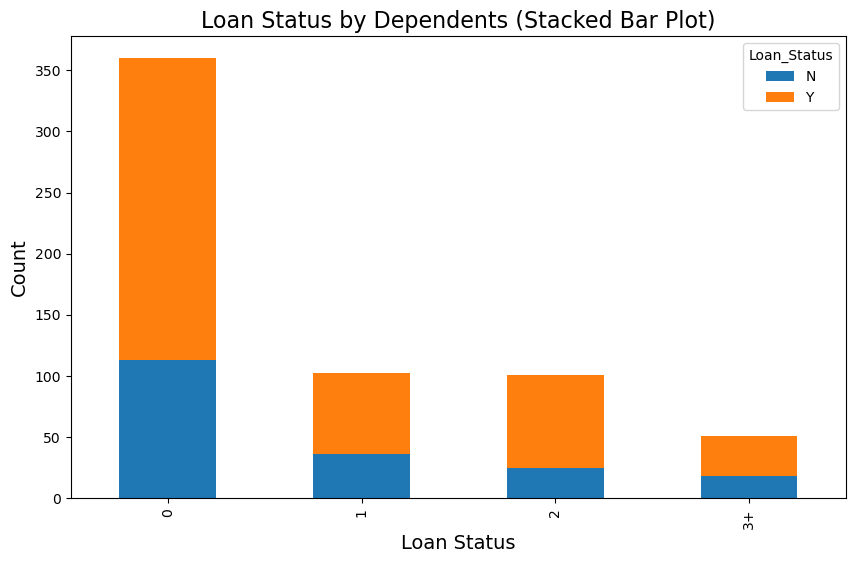

In [22]:
df.groupby([ 'Dependents','Loan_Status']).size().unstack().plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Loan Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Loan Status by Dependents (Stacked Bar Plot)', fontsize=16)
plt.show()


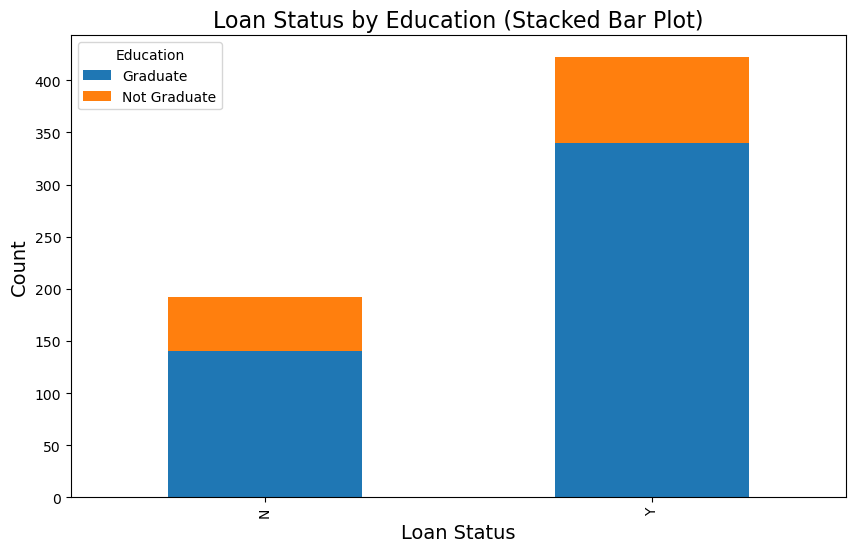

In [23]:
df.groupby(['Loan_Status', 'Education']).size().unstack().plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Loan Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Loan Status by Education (Stacked Bar Plot)', fontsize=16)
plt.show()


Graduated people taken more loan then Not graduated 

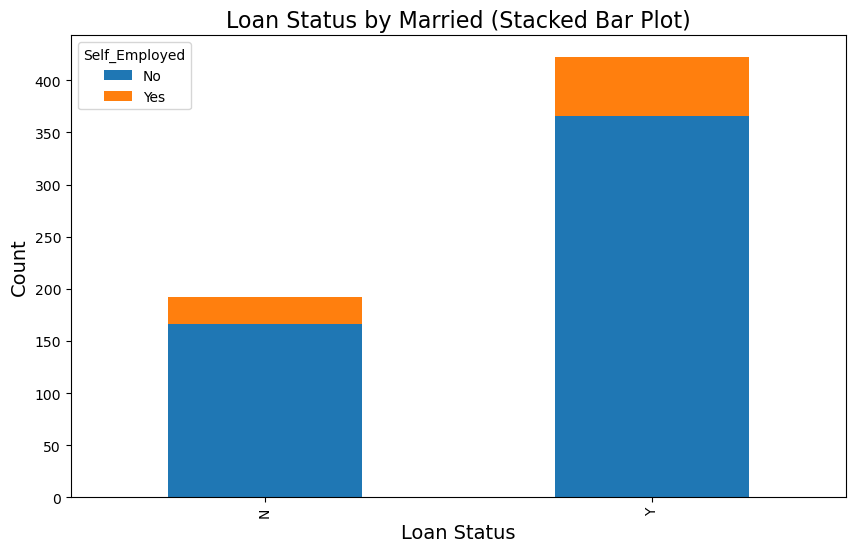

In [24]:
df.groupby(['Loan_Status', 'Self_Employed']).size().unstack().plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Loan Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Loan Status by Married (Stacked Bar Plot)', fontsize=16)
plt.show()


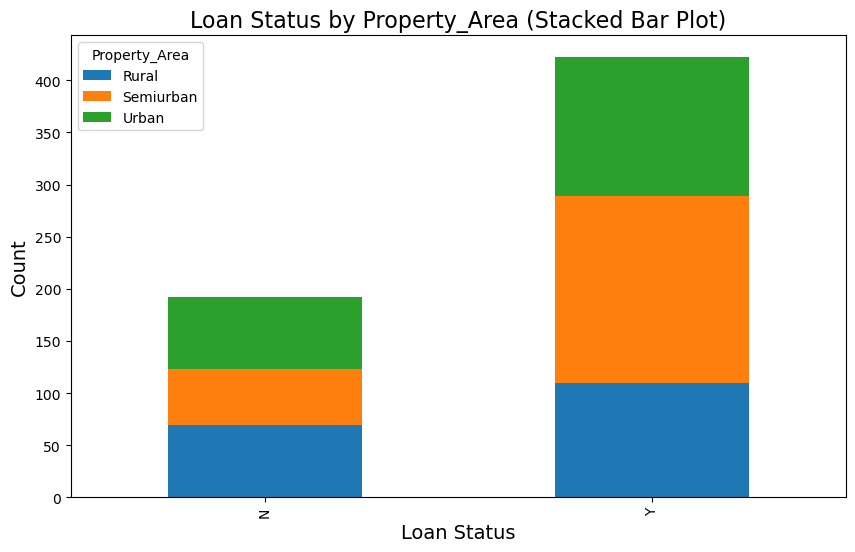

In [25]:
df.groupby(['Loan_Status','Property_Area']).size().unstack().plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Loan Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Loan Status by Property_Area (Stacked Bar Plot)', fontsize=16)
plt.show()


People who are living in Semiurban did take more loan

## Pairplot

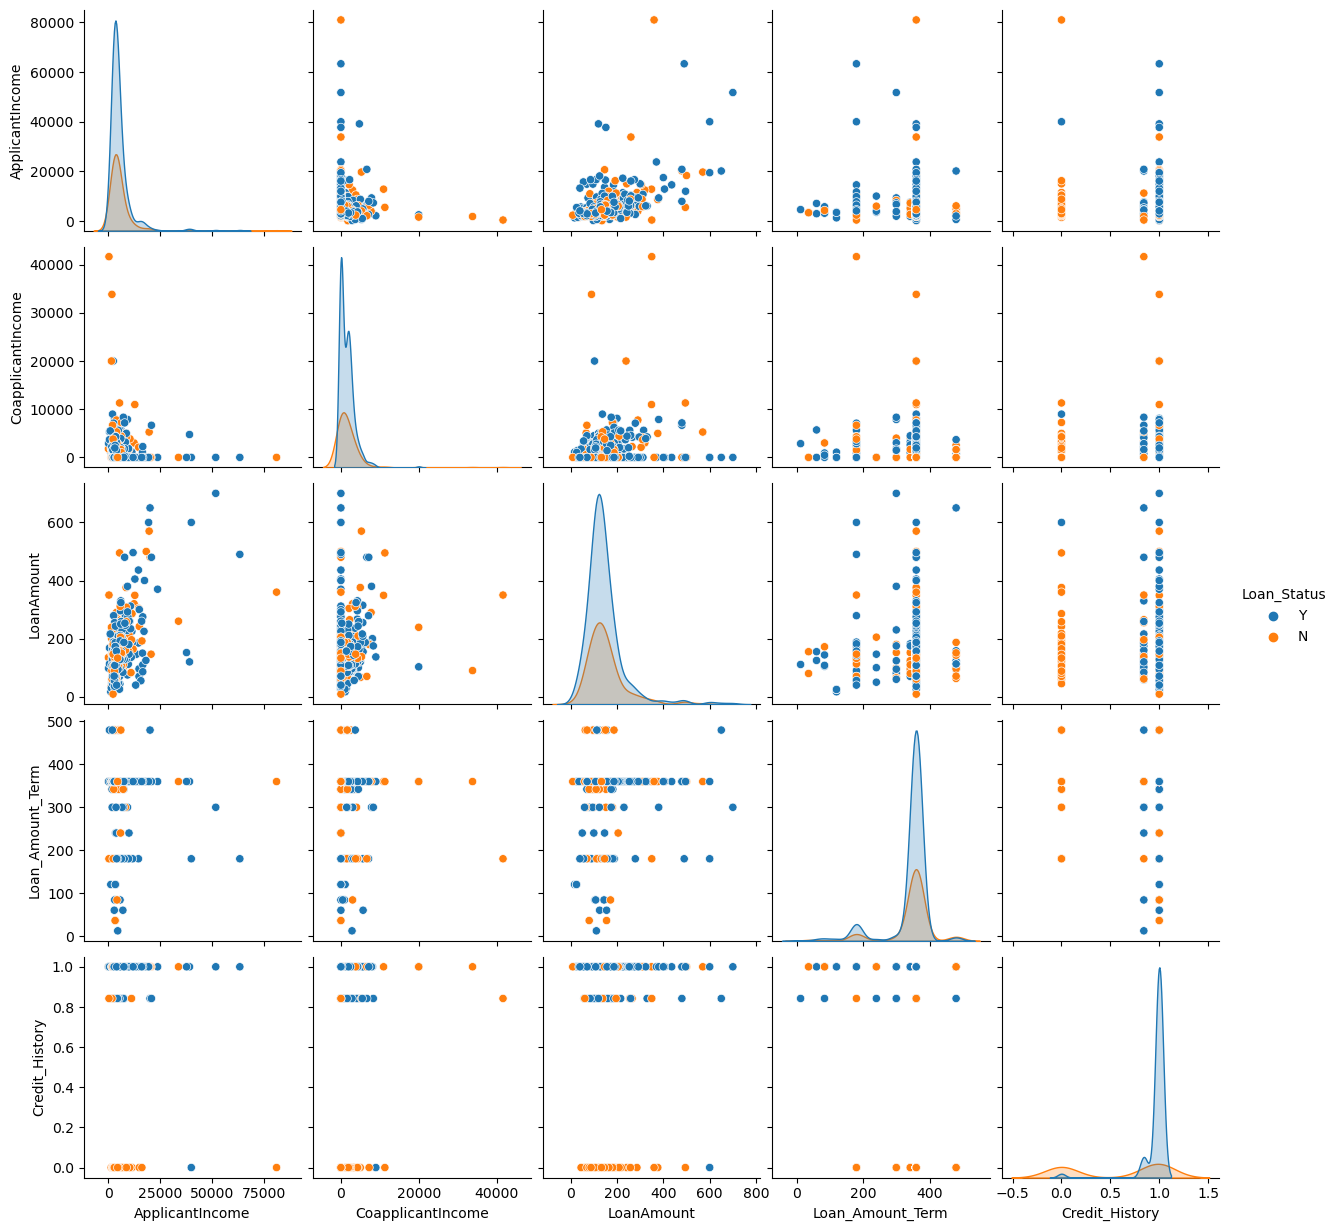

In [26]:
sns.pairplot(df, hue='Loan_Status', diag_kind='kde')
plt.show()


We are able to visualize using pairplot that how the datapoints are distributed in each of the numerical data columns.

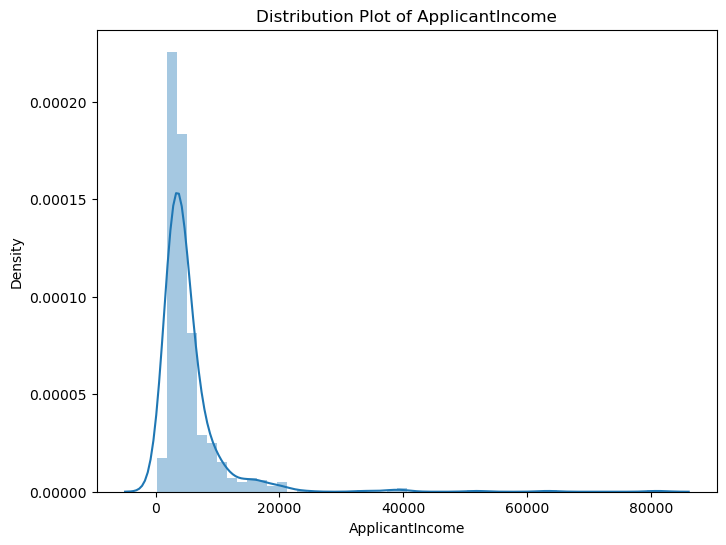

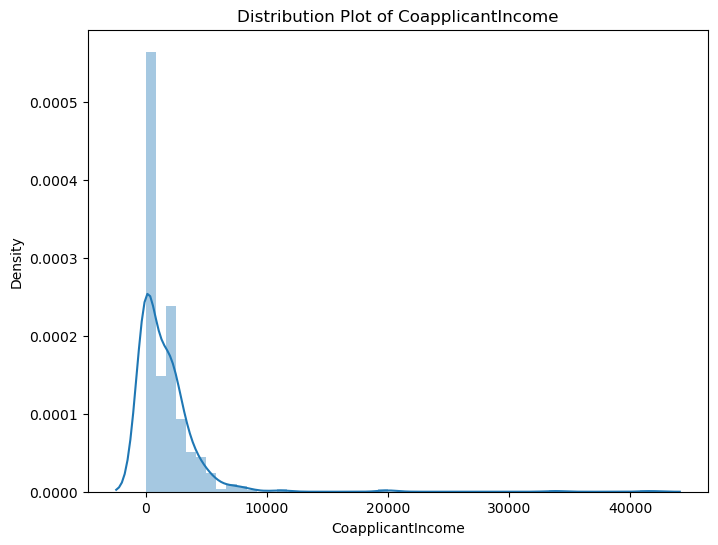

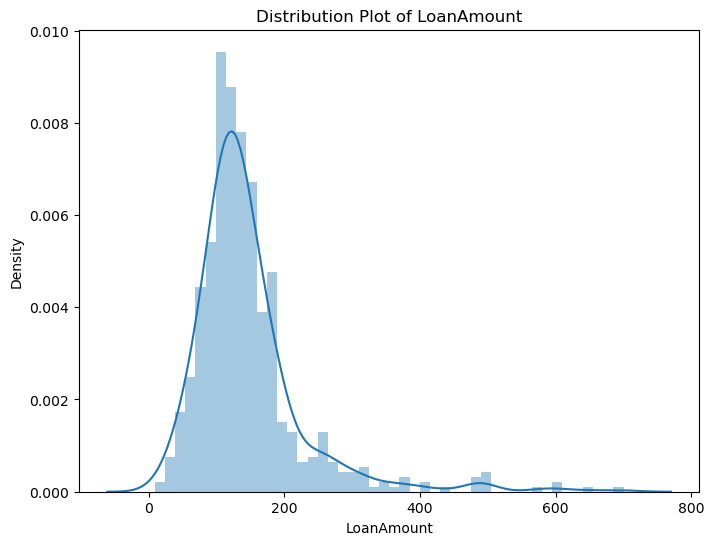

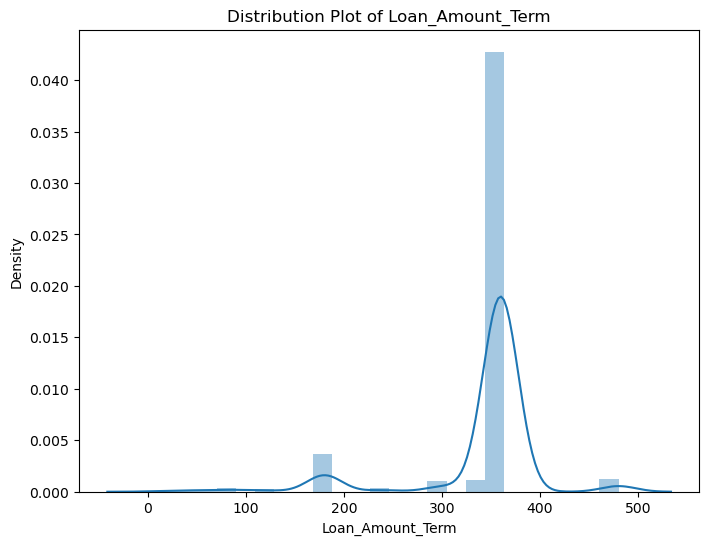

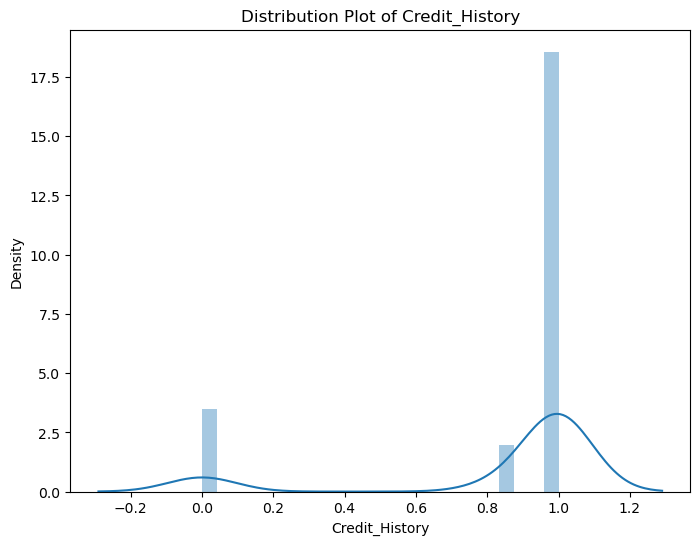

In [27]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.distplot(df[column], kde=True, hist=True)
    plt.title(f'Distribution Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()


## Checking outliers

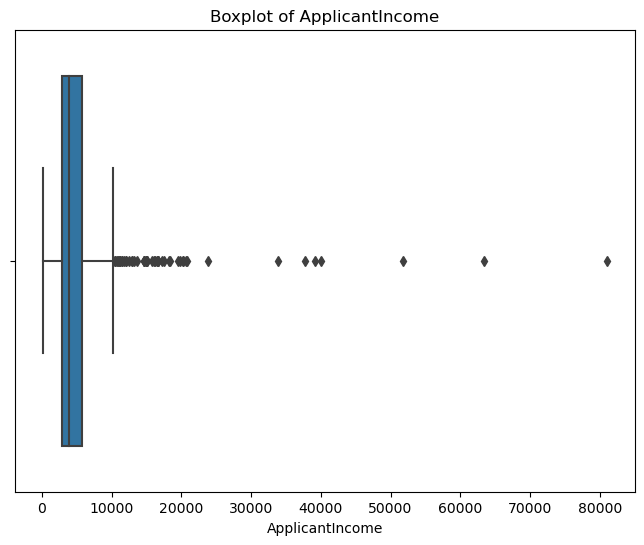

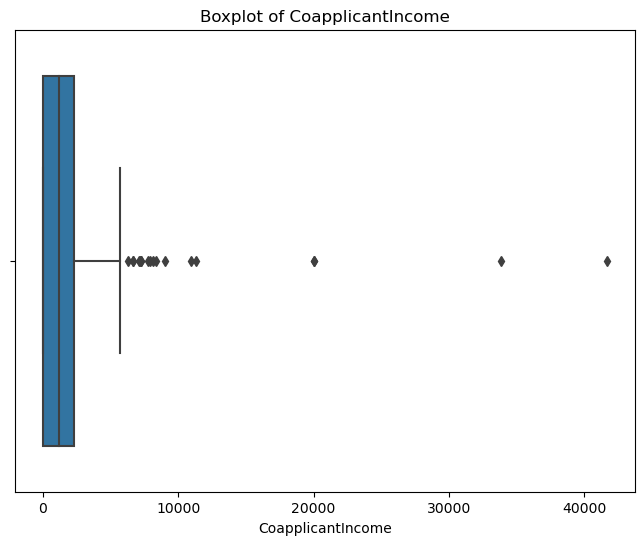

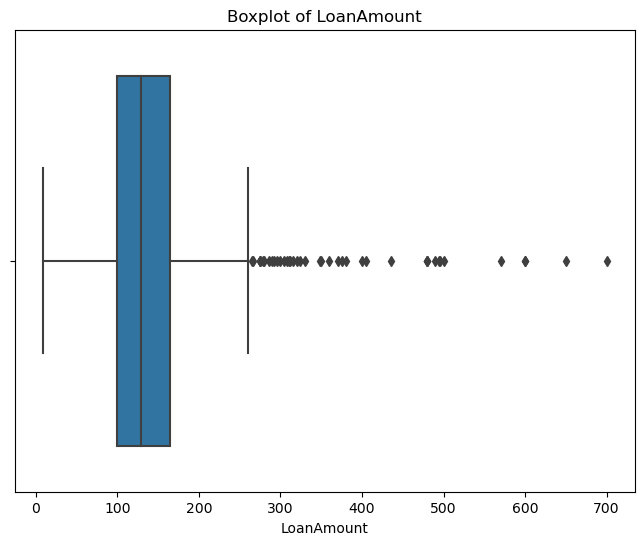

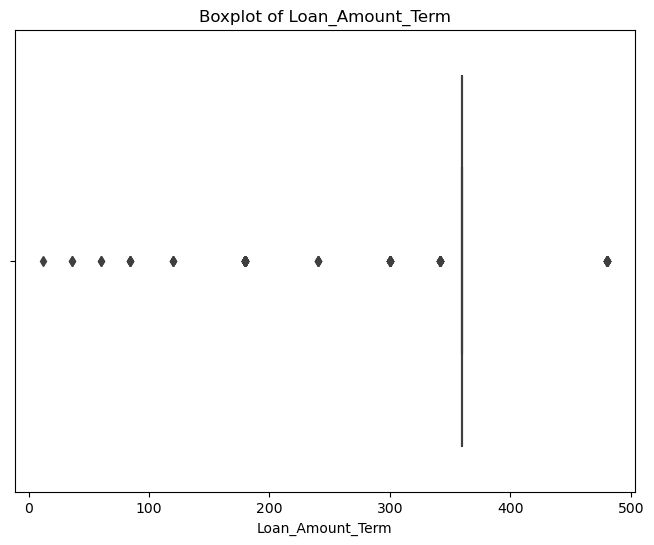

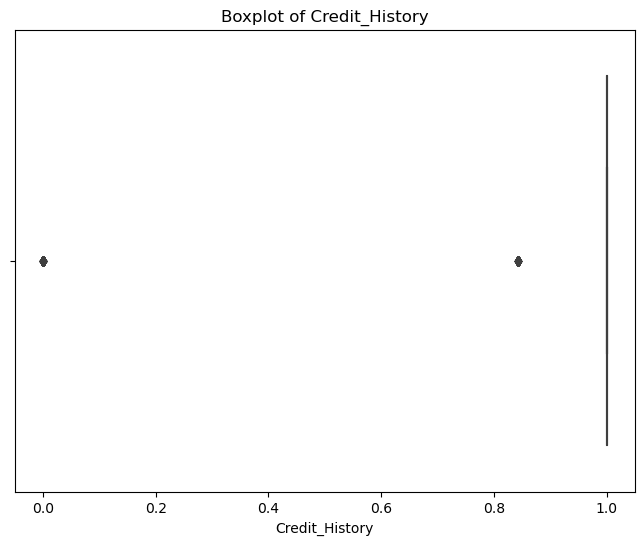

In [28]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()


We can observe that there are many outliers present in our numerical column, So we treat them

In [29]:
from scipy.stats import zscore

# Features containing outliers
features = df[['ApplicantIncome', 'Credit_History', 'Loan_Amount_Term', 'LoanAmount', 'CoapplicantIncome']]

z = np.abs(zscore(features))

# Creating a new dataframe
df1 = df[(z < 3).all(axis=1)]


In [30]:
data_loss = (len(df) - len(df1)) / len(df) * 100
print(f"Data loss after treating outliers: {data_loss:.2f}%")

Data loss after treating outliers: 6.03%


Total data loss is 6.03% so we can use this method

## Checking Skewness

In [31]:
numeric_features = df1.select_dtypes(include=['float64', 'int64'])

skewness_list = []

for column in numeric_features.columns:
    skewness = numeric_features[column].skew()
    skewness_list.append(skewness)

skewness_df = pd.DataFrame({'Feature': numeric_features.columns, 'Skewness': skewness_list})
skewness_df = skewness_df.sort_values(by='Skewness', ascending=False)

print(skewness_df)

             Feature  Skewness
0    ApplicantIncome  2.148522
1  CoapplicantIncome  1.350517
2         LoanAmount  1.113132
4     Credit_History -1.921860
3   Loan_Amount_Term -2.077031


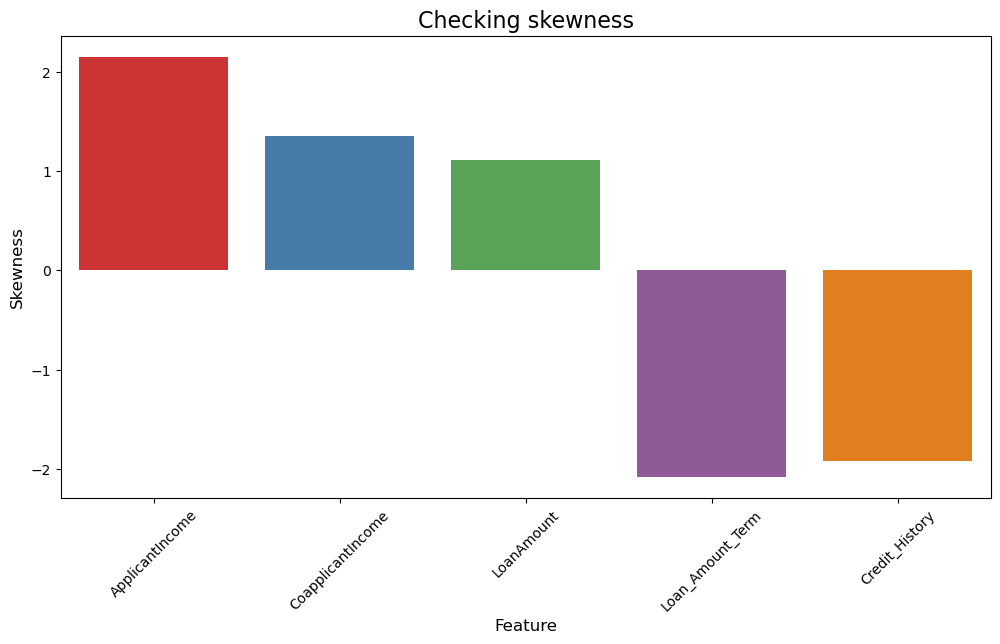

In [32]:
numeric_columns = df1.select_dtypes(include=['float64', 'int64']).columns
skew_values = df1[numeric_columns].skew()

plt.figure(figsize=(12, 6))
sns.barplot(x=skew_values.index, y=skew_values.values, palette="Set1")
plt.title("Checking skewness", fontsize=16)
plt.xticks(rotation=45)
plt.xlabel("Feature", fontsize=12)
plt.ylabel("Skewness", fontsize=12)
plt.show()


## Encoding

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1["Loan_Status"] = le.fit_transform(df1["Loan_Status"])
df1.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1


In [34]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
df1['Gender'] = oe.fit_transform(df1['Gender'].values.reshape(-1, 1))
df1['Married'] = oe.fit_transform(df1['Married'].values.reshape(-1, 1))
df1['Dependents'] = oe.fit_transform(df1['Dependents'].values.reshape(-1, 1))
df1['Education'] = oe.fit_transform(df1['Education'].values.reshape(-1, 1))
df1['Self_Employed'] = oe.fit_transform(df1['Self_Employed'].values.reshape(-1, 1))
df1['Property_Area'] = oe.fit_transform(df1['Property_Area'].values.reshape(-1, 1))
df1.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1


In [35]:
df1.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.378997,0.188162,0.045696,-0.006207,0.026943,0.190543,0.159957,-0.104412,0.016566,-0.026340,0.017408
Married,0.378997,1.000000,0.329900,0.024817,-0.015779,-0.008567,0.237322,0.165147,-0.127289,0.013364,0.010595,0.089026
Dependents,0.188162,0.329900,1.000000,0.069814,0.044543,0.077227,-0.026220,0.135610,-0.083756,-0.017044,0.002327,0.017872
Education,0.045696,0.024817,0.069814,1.000000,-0.007139,-0.166400,-0.037780,-0.146598,-0.094628,-0.080920,-0.068596,-0.092658
Self_Employed,-0.006207,-0.015779,0.044543,-0.007139,1.000000,0.250665,-0.039572,0.121892,-0.033346,-0.014899,-0.028253,-0.026525
ApplicantIncome,0.026943,-0.008567,0.077227,-0.166400,0.250665,1.000000,-0.220975,0.442394,-0.050606,0.044016,-0.003641,-0.005003
CoapplicantIncome,0.190543,0.237322,-0.026220,-0.037780,-0.039572,-0.220975,1.000000,0.309479,-0.060345,-0.019224,-0.093505,0.045009
LoanAmount,0.159957,0.165147,0.135610,-0.146598,0.121892,0.442394,0.309479,1.000000,0.040302,0.006094,-0.075749,-0.035289
Loan_Amount_Term,-0.104412,-0.127289,-0.083756,-0.094628,-0.033346,-0.050606,-0.060345,0.040302,1.000000,0.030430,-0.058990,-0.018144
Credit_History,0.016566,0.013364,-0.017044,-0.080920,-0.014899,0.044016,-0.019224,0.006094,0.030430,1.000000,-0.009747,0.561857


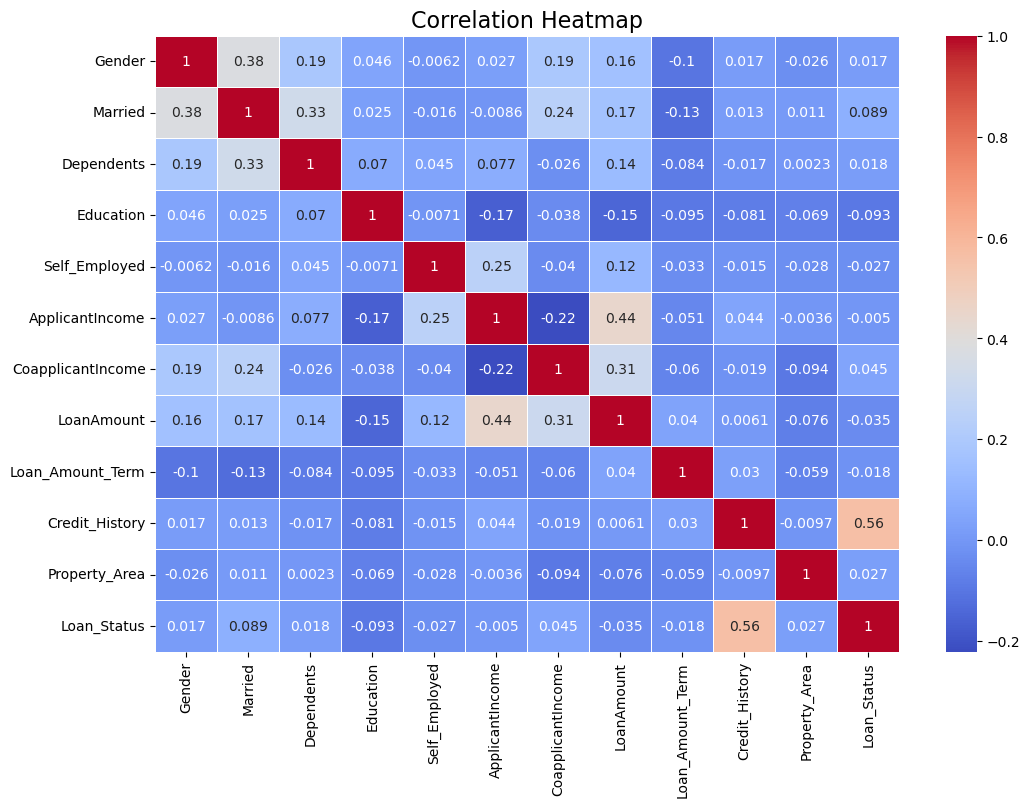

In [36]:
corr_matrix = df1.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

We can observe that there is no multicollinearity issue between the columns and columns are negatively correlated as compared to positive correlation

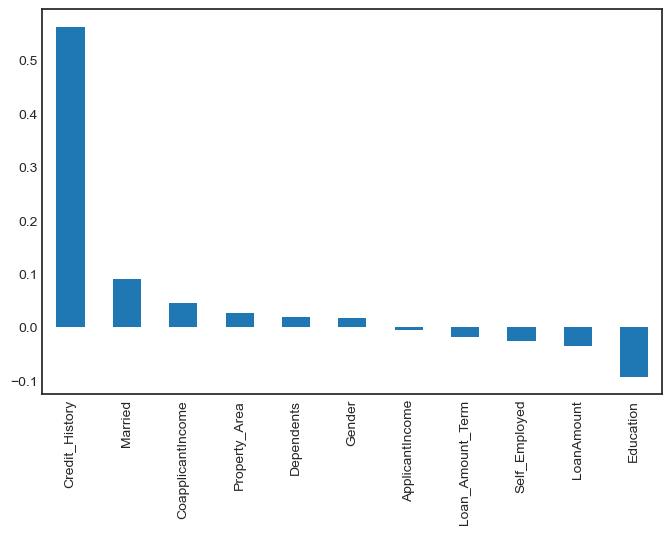

In [37]:
plt.style.use('seaborn-white')
loan_corr = df1.corr()
plt.figure(figsize=(8, 5))
loan_corr['Loan_Status'].sort_values(ascending=False).drop('Loan_Status').plot.bar()
plt.show()

We can see that columns loan amount term, loan amount, co applicant income and education are negatively correlated while all the remaining feature columns are positively correlated with our label column

## Seprating features and label

In [38]:
x = df1.drop('Loan_Status',axis=1)
y = df1['Loan_Status']

In [39]:
y.value_counts()

Loan_Status
1    398
0    179
Name: count, dtype: int64

## Feature Scaling

In [40]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.399266,-0.861036,0.184585,0.239408,0.456461,1.227472
1,0.477137,0.733939,0.282353,-0.541961,-0.380580,-0.028020,0.052840,-0.143355,0.239408,0.456461,-1.306522
2,0.477137,0.733939,-0.723313,-0.541961,2.627567,-0.562297,-0.861036,-1.247642,0.239408,0.456461,1.227472
3,0.477137,0.733939,-0.723313,1.845150,-0.380580,-0.703039,0.567956,-0.285844,0.239408,0.456461,1.227472
4,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.450230,-0.861036,0.088189,0.239408,0.456461,1.227472
...,...,...,...,...,...,...,...,...,...,...,...
572,-2.095835,-1.362511,-0.723313,-0.541961,-0.380580,-0.596048,-0.861036,-1.158587,0.239408,0.456461,-1.306522
573,0.477137,0.733939,2.293686,-0.541961,-0.380580,-0.189012,-0.861036,-1.710730,-3.237229,0.456461,-1.306522
574,0.477137,0.733939,0.282353,-0.541961,-0.380580,1.149549,-0.715592,2.083030,0.239408,0.456461,1.227472
575,0.477137,0.733939,1.288020,-0.541961,-0.380580,0.984507,-0.861036,0.907499,0.239408,0.456461,1.227472


## Checking VIF (Variance Inflation Factor) values

In [41]:
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i)
                     for i in range (len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,1.205681,Gender
1,1.341133,Married
2,1.173097,Dependents
3,1.074256,Education
4,1.072285,Self_Employed
5,1.632111,ApplicantIncome
6,1.453625,CoapplicantIncome
7,1.663066,LoanAmount
8,1.061187,Loan_Amount_Term
9,1.010957,Credit_History


We can observe that none of the feature column has value greater than 10, so we can now proceed without any issue.

In [42]:
max_accuracy = 0
best_random_state = 0
best_test_size = 0

# Define a list of test sizes to iterate over
test_sizes = [0.20, 0.25, 0.30, 0.35]

for test_size in test_sizes:
    for random_state in range(1, 1000):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state)
        lr = LogisticRegression()
        lr.fit(x_train, y_train)
        pred = lr.predict(x_test)
        accuracy = accuracy_score(y_test, pred)

        if accuracy > max_accuracy:
            max_accuracy = accuracy
            best_random_state = random_state
            best_test_size = test_size

print("Best accuracy score is", max_accuracy, "on Random State", best_random_state, "with Test Size", best_test_size)


Best accuracy score is 0.9224137931034483 on Random State 494 with Test Size 0.2


In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [44]:
print("x_train shape:",x_train.shape,)
print("y_train shape:",y_train.shape)
print("x_test shape:",x_test.shape)
print("y_test.shape:",y_test.shape)

x_train shape: (461, 11)
y_train shape: (461,)
x_test shape: (116, 11)
y_test.shape: (116,)


## LogisticRegression

In [45]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

LR = LogisticRegression()

grid_search = GridSearchCV(LR, param_grid, cv=5, scoring='accuracy')

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_

best_LR = LogisticRegression(**best_params)

best_LR.fit(x_train, y_train)

predLR = best_LR.predict(x_test)

accuracy = accuracy_score(y_test, predLR)
conf_matrix = confusion_matrix(y_test, predLR)
class_report = classification_report(y_test, predLR)

print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)



Best Hyperparameters: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.8275862068965517

Confusion Matrix:
 [[12 19]
 [ 1 84]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.39      0.55        31
           1       0.82      0.99      0.89        85

    accuracy                           0.83       116
   macro avg       0.87      0.69      0.72       116
weighted avg       0.84      0.83      0.80       116



Accuracy: 0.8275862068965517

Confusion Matrix:
 [[12 19]
 [ 1 84]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.39      0.55        31
           1       0.82      0.99      0.89        85

    accuracy                           0.83       116
   macro avg       0.87      0.69      0.72       116
weighted avg       0.84      0.83      0.80       116



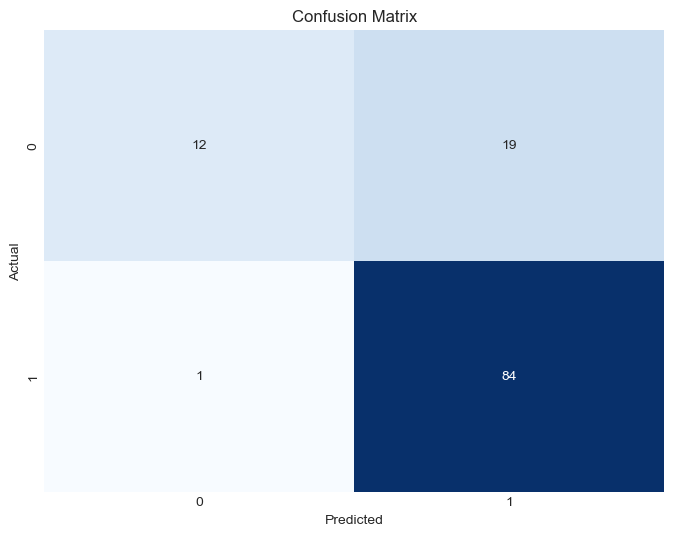

In [46]:
LR = LogisticRegression(C=1, penalty="l1", solver="liblinear")
LR.fit(x_train, y_train)

predLR = LR.predict(x_test)

accuracy = accuracy_score(y_test, predLR)
conf_matrix = confusion_matrix(y_test, predLR)
class_report = classification_report(y_test, predLR)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Checking accuracy for RandomForestClassifier

In [47]:
param_combinations = [
    {'n_estimators': 100, 'max_depth': 10, 'criterion': 'gini'},
    {'n_estimators': 150, 'max_depth': 15, 'criterion': 'gini'},
    {'n_estimators': 200, 'max_depth': 20, 'criterion': 'gini'},
    {'n_estimators': 100, 'max_depth': 10, 'criterion': 'entropy'},
    {'n_estimators': 150, 'max_depth': 15, 'criterion': 'entropy'},
    {'n_estimators': 200, 'max_depth': 20, 'criterion': 'entropy'},
    {'n_estimators': 250, 'max_depth': 25, 'criterion': 'gini'},
    {'n_estimators': 300, 'max_depth': 30, 'criterion': 'gini'},
    {'n_estimators': 350, 'max_depth': 35, 'criterion': 'gini'},
    {'n_estimators': 250, 'max_depth': 25, 'criterion': 'entropy'},
    {'n_estimators': 300, 'max_depth': 30, 'criterion': 'entropy'},
    {'n_estimators': 350, 'max_depth': 35, 'criterion': 'entropy'},
]

best_accuracy = 0
best_params = None

for params in param_combinations:
    rf_classifier = RandomForestClassifier(**params, random_state=42)
    rf_classifier.fit(x_train, y_train)
    y_pred = rf_classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best Parameters:", best_params)
print("Test Accuracy:", best_accuracy)


Best Parameters: {'n_estimators': 100, 'max_depth': 10, 'criterion': 'gini'}
Test Accuracy: 0.8275862068965517


Accuracy: 0.8275862068965517
Confusion Matrix:
 [[13 18]
 [ 2 83]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.42      0.57        31
           1       0.82      0.98      0.89        85

    accuracy                           0.83       116
   macro avg       0.84      0.70      0.73       116
weighted avg       0.83      0.83      0.81       116



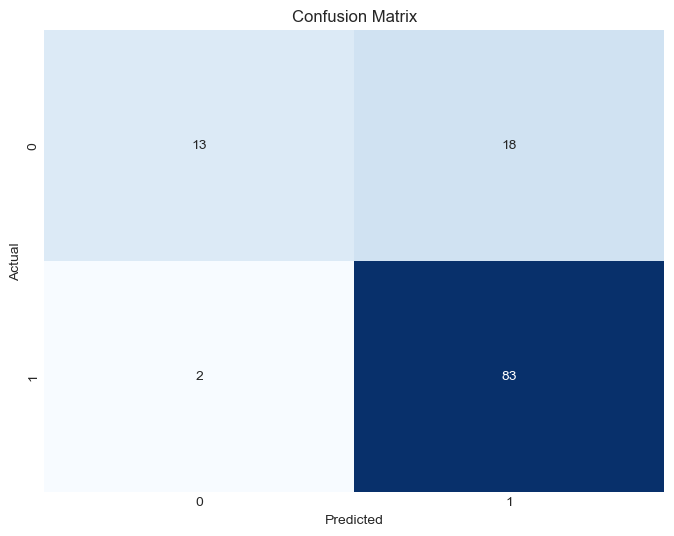

In [48]:
RFC = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=10)
RFC.fit(x_train, y_train)

predRFC = RFC.predict(x_test)

accuracy = accuracy_score(y_test, predRFC)
conf_matrix = confusion_matrix(y_test, predRFC)
class_report = classification_report(y_test, predRFC)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Support vector classifier

In [49]:
param_dist = {
    'C': randint(1, 100),
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto', 0.1, 1],
}

svm_classifier = SVC()
random_search = RandomizedSearchCV(estimator=svm_classifier, param_distributions=param_dist, 
                                   n_iter=10, scoring='accuracy', cv=5, random_state=42)

random_search.fit(x_train, y_train)

best_params, best_estimator = random_search.best_params_, random_search.best_estimator_
y_pred = best_estimator.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print("Best Parameters:", best_params)
print("Test Accuracy:", accuracy)


Best Parameters: {'C': 38, 'degree': 3, 'gamma': 1, 'kernel': 'linear'}
Test Accuracy: 0.8275862068965517


Accuracy: 0.7844827586206896
Confusion Matrix:
 [[14 17]
 [ 8 77]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.45      0.53        31
           1       0.82      0.91      0.86        85

    accuracy                           0.78       116
   macro avg       0.73      0.68      0.69       116
weighted avg       0.77      0.78      0.77       116



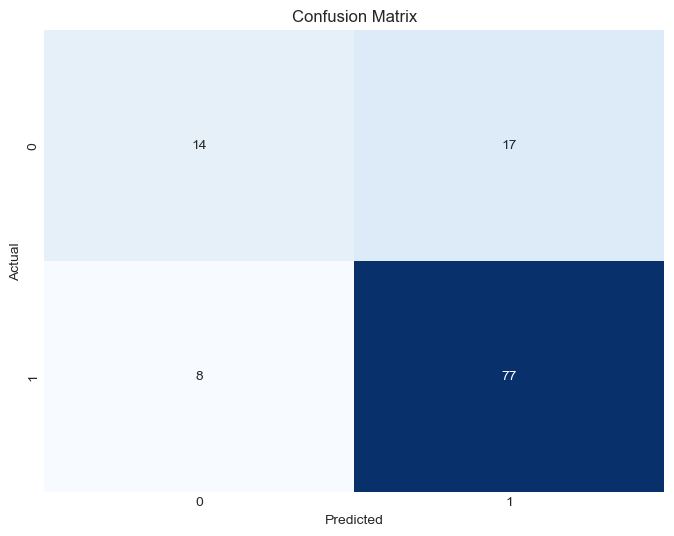

In [50]:
svc_rbf = SVC(kernel='rbf', gamma='auto', C=42)
svc_rbf.fit(x_train, y_train)

predsvc_rbf = svc_rbf.predict(x_test)

accuracy = accuracy_score(y_test, predsvc_rbf)
conf_matrix = confusion_matrix(y_test, predsvc_rbf)
class_report = classification_report(y_test, predsvc_rbf)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## DecisionTreeClassifier

In [51]:
param_combinations = [
    {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 2},
    {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 2},
    {'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 2},
    {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 2},
]

best_accuracy = 0
best_params = None

for params in param_combinations:
    dt_classifier = DecisionTreeClassifier(**params, random_state=42)
    dt_classifier.fit(x_train, y_train)
    y_pred = dt_classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best Parameters:", best_params)
print("Test Accuracy:", best_accuracy)


Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1}
Test Accuracy: 0.7844827586206896


Accuracy: 0.7844827586206896
Confusion Matrix:
 [[13 18]
 [ 7 78]]
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.42      0.51        31
           1       0.81      0.92      0.86        85

    accuracy                           0.78       116
   macro avg       0.73      0.67      0.69       116
weighted avg       0.77      0.78      0.77       116



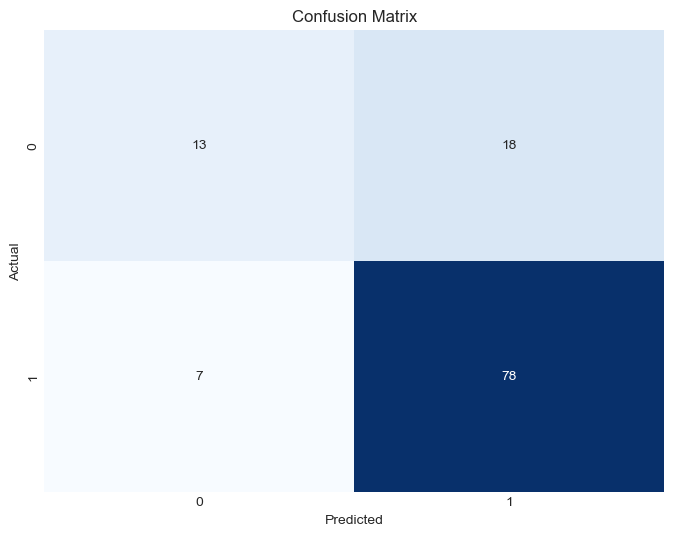

In [52]:
dtc = DecisionTreeClassifier(criterion='entropy',max_depth = 10, min_samples_split=2, min_samples_leaf=1)
dtc.fit(x_train, y_train)

pred_dtc = dtc.predict(x_test)

accuracy = accuracy_score(y_test, pred_dtc)
conf_matrix = confusion_matrix(y_test, pred_dtc)
class_report = classification_report(y_test, pred_dtc)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## ExtraTreesClassifier

In [53]:
param_combinations = [
    {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'n_estimators': 150, 'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'n_estimators': 150, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'n_estimators': 200, 'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 2},
    {'n_estimators': 200, 'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 2},
    {'n_estimators': 250, 'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 4, 'min_samples_leaf': 2},
    {'n_estimators': 250, 'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 4, 'min_samples_leaf': 2},
]

best_accuracy = 0
best_params = None

for params in param_combinations:
    et_classifier = ExtraTreesClassifier(**params, random_state=42)
    et_classifier.fit(x_train, y_train)
    y_pred = et_classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best Parameters:", best_params)
print("Test Accuracy:", best_accuracy)


Best Parameters: {'n_estimators': 200, 'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 2}
Test Accuracy: 0.8275862068965517


Accuracy: 0.8103448275862069
Confusion Matrix:
 [[14 17]
 [ 5 80]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.45      0.56        31
           1       0.82      0.94      0.88        85

    accuracy                           0.81       116
   macro avg       0.78      0.70      0.72       116
weighted avg       0.80      0.81      0.79       116



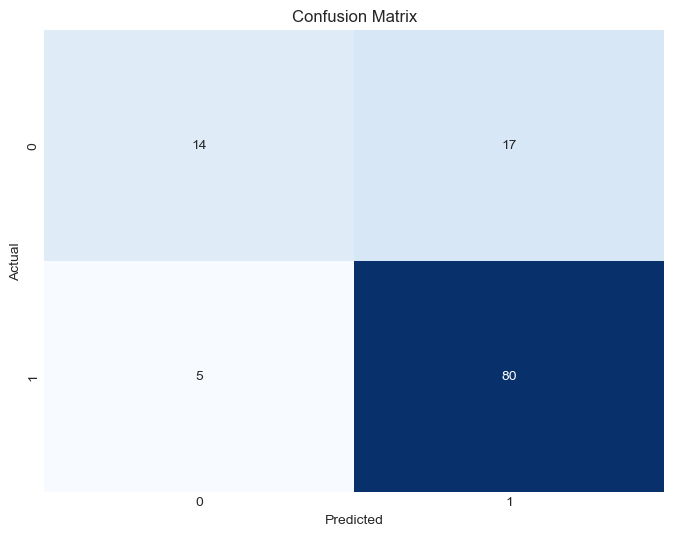

In [54]:
EXC = ExtraTreesClassifier(n_estimators=150, criterion='gini',max_depth=10,min_samples_split=2,min_samples_leaf=1)
EXC.fit(x_train, y_train)

pred_EXC = EXC.predict(x_test)

accuracy = accuracy_score(y_test, pred_EXC)
conf_matrix = confusion_matrix(y_test, pred_EXC)
class_report = classification_report(y_test, pred_EXC)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



 ## GradientBoostingClassifier

In [55]:
param_combinations = [
    {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 3},
    {'n_estimators': 150, 'learning_rate': 0.1, 'max_depth': 3},
    {'n_estimators': 100, 'learning_rate': 0.05, 'max_depth': 4},
    {'n_estimators': 150, 'learning_rate': 0.05, 'max_depth': 4},
    {'n_estimators': 200, 'learning_rate': 0.1, 'max_depth': 3},
    {'n_estimators': 200, 'learning_rate': 0.05, 'max_depth': 4},
    {'n_estimators': 250, 'learning_rate': 0.1, 'max_depth': 3},
    {'n_estimators': 250, 'learning_rate': 0.05, 'max_depth': 4},
]

best_accuracy = 0
best_params = None

for params in param_combinations:
    gb_classifier = GradientBoostingClassifier(**params, random_state=42)
    gb_classifier.fit(x_train, y_train)
    y_pred = gb_classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best Parameters:", best_params)
print("Test Accuracy:", best_accuracy)


Best Parameters: {'n_estimators': 100, 'learning_rate': 0.05, 'max_depth': 4}
Test Accuracy: 0.8275862068965517


Accuracy: 0.8103448275862069
Confusion Matrix:
 [[13 18]
 [ 4 81]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.42      0.54        31
           1       0.82      0.95      0.88        85

    accuracy                           0.81       116
   macro avg       0.79      0.69      0.71       116
weighted avg       0.80      0.81      0.79       116



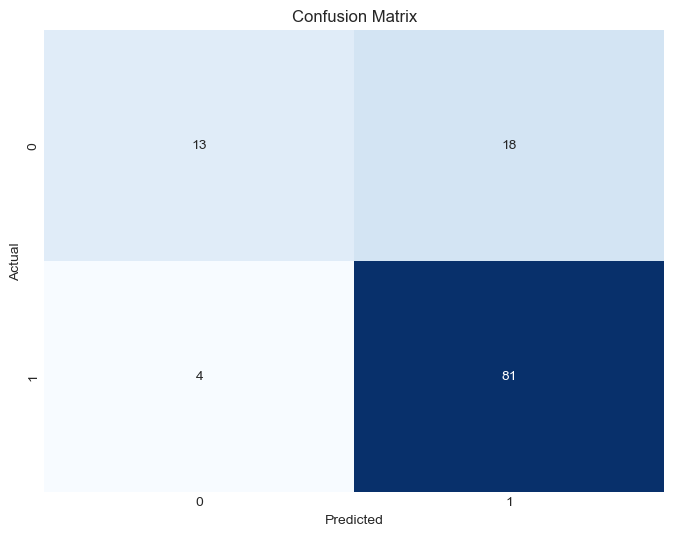

In [56]:
GBC = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
GBC.fit(x_train, y_train)

pred_GBC = GBC.predict(x_test)

accuracy = accuracy_score(y_test, pred_GBC)
conf_matrix = confusion_matrix(y_test, pred_GBC)
class_report = classification_report(y_test, pred_GBC)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## AdaBoostClassifier

In [57]:
param_combinations = [
    {'n_estimators': 50, 'learning_rate': 1.0},
    {'n_estimators': 100, 'learning_rate': 0.5},
    {'n_estimators': 150, 'learning_rate': 0.1},
]

best_accuracy = 0
best_params = None

for params in param_combinations:
    ada_classifier = AdaBoostClassifier(**params, random_state=42)
    ada_classifier.fit(x_train, y_train)
    y_pred = ada_classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best Parameters:", best_params)
print("Test Accuracy:", best_accuracy)


Best Parameters: {'n_estimators': 50, 'learning_rate': 1.0}
Test Accuracy: 0.8189655172413793


Accuracy: 0.8189655172413793
Confusion Matrix:
 [[12 19]
 [ 2 83]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.39      0.53        31
           1       0.81      0.98      0.89        85

    accuracy                           0.82       116
   macro avg       0.84      0.68      0.71       116
weighted avg       0.83      0.82      0.79       116



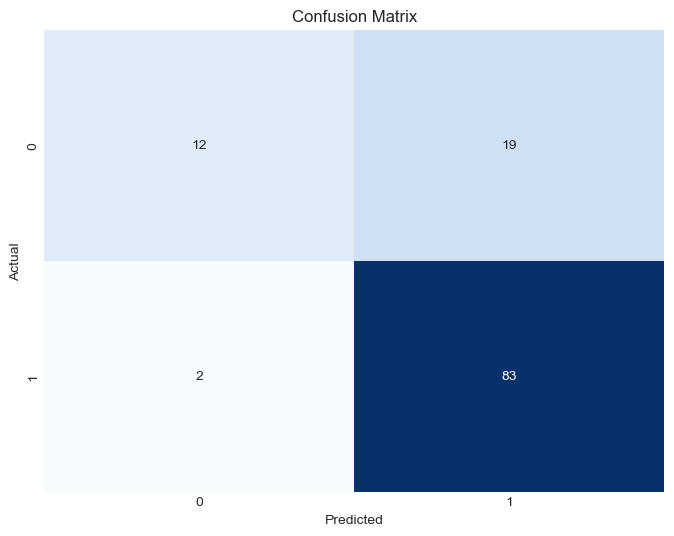

In [58]:
ABC = AdaBoostClassifier(n_estimators=150, learning_rate=0.1)
ABC.fit(x_train, y_train)

pred_ABC = ABC.predict(x_test)

accuracy = accuracy_score(y_test, pred_ABC)
conf_matrix = confusion_matrix(y_test, pred_ABC)
class_report = classification_report(y_test, pred_ABC)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## ExtraTreesClassifier gives better accuracy

## Cross Validation Score

In [74]:
score = cross_val_score(EXC, x, y, cv=5)
print(score)
print(score.mean())
print( accuracy_score(y_test, predRFC) - score.mean())

[0.78448276 0.77586207 0.77391304 0.83478261 0.8173913 ]
0.7972863568215892
0.030299850074962498


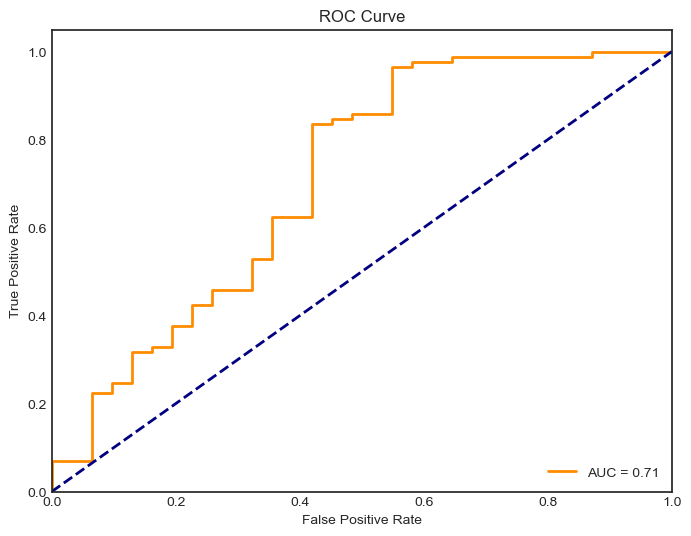

In [75]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

pred_probs = EXC.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, pred_probs)
roc_auc = roc_auc_score(y_test, pred_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [76]:
values = pd.DataFrame({'Actual': y_test, 'Predicted': pred_EXC})
values.head(10)


,Actual,Predicted
122,1,0
414,0,0
544,1,1
105,1,1
461,1,1
166,0,0
204,1,1
31,0,1
86,1,1
221,1,1


## CRoss validation

In [77]:
# Checking cv score for EXC
score = cross_val_score(EXC, x, y, cv=5)
print(score)
print(score.mean())
print( accuracy_score(y_test, predRFC) - score.mean())

[0.79310345 0.78448276 0.77391304 0.84347826 0.83478261]
0.805952023988006
0.021634182908545685


In [78]:
import joblib
# Save the model as a objectfile

joblib.dump(EXC,'Loan_Application_Status_Prediction')

['Loan_Application_Status_Prediction']

In [79]:
model=joblib.load(open("Loan_Application_Status_Prediction","rb"))

In [80]:
df1.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1
5,1.0,1.0,2.0,0.0,1.0,5417,4196.0,267.000000,360.0,1.0,2.0,1
6,1.0,1.0,0.0,1.0,0.0,2333,1516.0,95.000000,360.0,1.0,2.0,1
7,1.0,1.0,3.0,0.0,0.0,3036,2504.0,158.000000,360.0,0.0,1.0,0
8,1.0,1.0,2.0,0.0,0.0,4006,1526.0,168.000000,360.0,1.0,2.0,1
10,1.0,1.0,2.0,0.0,0.0,3200,700.0,70.000000,360.0,1.0,2.0,1


In [81]:
test = (1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0) #taking data from 1st row of the df
arr = np.asarray(test)    # changing input_data to a numpy array
reshape = arr.reshape(1,-1)  # reshape the array
pred = model.predict(reshape)
print(pred)

[1]


### Model giving correct prediction